In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def cv_show(img, name='image'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#### 直方圖

```cv2.calcHist(images,channels,mask,histSize,ranges)```
* images: 原圖像格是為uint8或 float32, 要加 []
* channels: BGR; 對應[0] [1] [2]
* mask: 統計部分圖像
* histSize: bin數
* ranges: 像數值範圍[0, 256]

In [3]:
img = cv2.imread('dataset/cat.jpg', 0) # 0表示灰階
hist = cv2.calcHist([img], [0], None, [256], [0,256])
hist.size

256

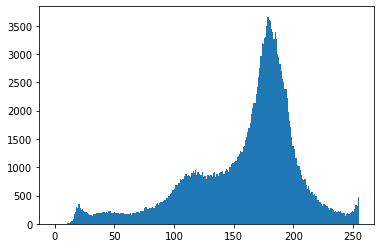

In [4]:
plt.hist(img.ravel(), 256)
plt.show()

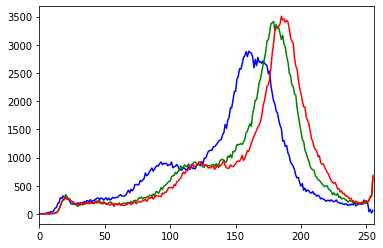

In [11]:
img = cv2.imread('dataset/cat.jpg')
color = ['b', 'g', 'r']
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])

#### mask操作

In [12]:
mask = np.zeros(img.shape[:2], np.uint8) 
# 選擇要保存的區域設置成255
mask[100: 300, 100:400] = 255
cv_show(mask)

In [13]:
img = cv2.imread('dataset/cat.jpg', 0) # 0表示灰階
mask_img = cv2.bitwise_and(img, img, mask=mask)
cv_show(mask_img)

In [14]:
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

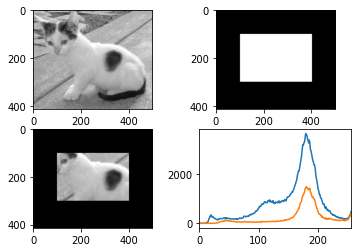

In [15]:
plt.subplot(221)
plt.imshow(img, 'gray')
plt.subplot(222)
plt.imshow(mask, 'gray')
plt.subplot(223)
plt.imshow(mask_img, 'gray')
plt.subplot(224)
plt.plot(hist_full)
plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

#### 均衡直方圖

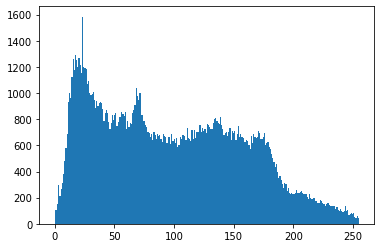

In [30]:
img = cv2.imread('dataset/clahe.jpg', 0)
plt.hist(img.ravel(), 256)
plt.show()

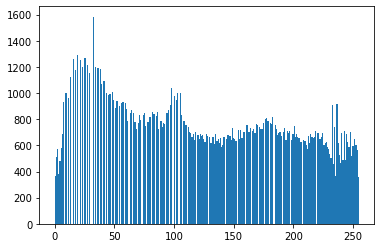

In [31]:
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(), 256)
plt.show()

In [32]:
res = np.hstack((img, equ))
cv_show(res)

#### 自適應直方圖均衡畫

In [29]:
img = cv2.imread('dataset/clahe.jpg', 0)

In [33]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
res_clahe = clahe.apply(img)
res = np.hstack((img, equ, res_clahe))
cv_show(res)

#### 傅立葉轉換
* 高頻: 變化劇烈的灰度分量, 譬如邊界
* 低頻: 變化緩慢的灰度芬輛
#### 濾波
* 低通濾波器: 只保留低頻, 使圖像模糊
* 高通濾波器: 只保留高頻, 使圖像細節增強

* opencv中主要就是cv2.dft() 和cv2.idft(), 輸入圖像需要先轉換成np.float32
* 得到的結果中, 頻率為0的部分會在左上角, 通常要轉換到中心位置, 可以通過shift來實現
* cv2.dft()返回的結果是雙通道(實部, 虛部), 童常還需要轉換成圖像格式才能展現(0, 255)

In [34]:
img = cv2.imread('dataset/lena.jpg', 0)

In [35]:
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

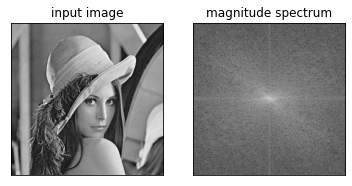

In [37]:
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('input image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('magnitude spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

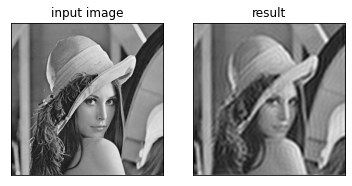

In [38]:
# 低通
img = cv2.imread('dataset/lena.jpg', 0)
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2) #中心位置
# 低通  mask
mask = np.zeros((rows, cols, 2), np.uint8) 
mask[crow - 30: crow + 30, ccol - 30: ccol + 30] = 1

# IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('input image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back, cmap='gray')
plt.title('result')
plt.xticks([])
plt.yticks([])
plt.show()

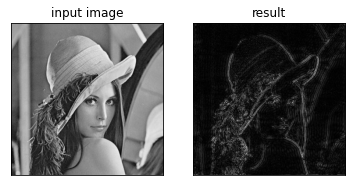

In [39]:
# 高通
img = cv2.imread('dataset/lena.jpg', 0)
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2) #中心位置
# 高通 mask
mask = np.ones((rows, cols, 2), np.uint8) 
mask[crow - 30: crow + 30, ccol - 30: ccol + 30] = 0

# IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('input image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back, cmap='gray')
plt.title('result')
plt.xticks([])
plt.yticks([])
plt.show()